# Joe Wehbe - 202000908

# Laptop Price Prediction

### 1. Collecting Data

Importing necessary libraries

In [143]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

Loading the dataset

In [144]:
dataset = pd.read_csv('laptoppricing.csv', encoding = 'unicode_escape')
dataset

,ï»¿Manufacturer,IntelCore(i-),IntelCoreGen,processing speed(GHz),Ram(gb),HDD(gb),SSD(gb),Graphics(gb),ScreenSize(inch),Price
0,Dell,3,7,2.29,4,1000,0,0,15.6,39057
1,Dell,3,7,2.30,4,1000,0,0,15.6,45141
2,HP,3,7,2.30,8,256,256,0,14.0,35999
3,ASUS,3,7,2.30,4,1000,0,0,14.0,39990
4,HP,3,7,2.40,4,1000,0,0,15.6,36263
5,HP,2,4,2.30,4,500,256,0,14.0,26403
6,Lenovo,3,7,2.30,4,1000,0,0,15.6,38290
7,HP,5,8,1.60,8,1000,0,0,14.0,53554
8,Lenovo,1,3,1.80,4,1000,0,0,15.6,29990
9,Dell,3,8,3.90,4,1000,0,0,14.0,38090


### 2. Preparing the Data

Randomizing the data to ensure even distribution

In [145]:
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
dataset

,ï»¿Manufacturer,IntelCore(i-),IntelCoreGen,processing speed(GHz),Ram(gb),HDD(gb),SSD(gb),Graphics(gb),ScreenSize(inch),Price
0,ASUS,7,9,2.60,32,1000,512,8,17.3,402990
1,ASUS,5,8,1.60,8,512,512,0,15.6,56990
2,HP,3,7,2.30,4,1000,0,0,14.0,33905
3,ASUS,7,8,2.20,8,1000,16,4,15.6,109999
4,Lenovo,1,3,1.80,4,1000,0,0,15.6,29990
5,Dell,3,8,3.90,4,1000,0,0,14.0,38090
6,HP,5,9,2.40,8,1000,0,4,15.6,69071
7,Dell,3,7,2.29,4,1000,0,0,15.6,39057
8,Lenovo,5,9,2.40,8,1000,256,3,15.6,92990
9,Lenovo,3,8,2.10,4,1000,0,0,15.6,42590


Checking for null values

In [146]:
dataset.isnull().any()

ï»¿Manufacturer          False
IntelCore(i-)            False
IntelCoreGen             False
processing speed(GHz)    False
Ram(gb)                  False
HDD(gb)                  False
SSD(gb)                  False
Graphics(gb)             False
ScreenSize(inch)         False
Price                    False
dtype: bool

Checking for duplicate values

In [147]:
print(dataset.duplicated().sum())

0


Converting categorical attributes to numerical attributes

In [148]:
label_encoder = preprocessing.LabelEncoder()
dataset['ï»¿Manufacturer'] = dataset['ï»¿Manufacturer'].astype('|S')
dataset['ï»¿Manufacturer'] = label_encoder.fit_transform(dataset['ï»¿Manufacturer'])
dataset

,ï»¿Manufacturer,IntelCore(i-),IntelCoreGen,processing speed(GHz),Ram(gb),HDD(gb),SSD(gb),Graphics(gb),ScreenSize(inch),Price
0,0,7,9,2.60,32,1000,512,8,17.3,402990
1,0,5,8,1.60,8,512,512,0,15.6,56990
2,2,3,7,2.30,4,1000,0,0,14.0,33905
3,0,7,8,2.20,8,1000,16,4,15.6,109999
4,3,1,3,1.80,4,1000,0,0,15.6,29990
5,1,3,8,3.90,4,1000,0,0,14.0,38090
6,2,5,9,2.40,8,1000,0,4,15.6,69071
7,1,3,7,2.29,4,1000,0,0,15.6,39057
8,3,5,9,2.40,8,1000,256,3,15.6,92990
9,3,3,8,2.10,4,1000,0,0,15.6,42590


Checking the variance inflation factor

In [149]:
variables = dataset[['ï»¿Manufacturer', 'IntelCore(i-)', 'IntelCoreGen',
       'processing speed(GHz)', 'Ram(gb)', 'HDD(gb)', 'SSD(gb)',
       'Graphics(gb)', 'ScreenSize(inch)']]

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,4.830255,ï»¿Manufacturer
1,40.647852,IntelCore(i-)
2,74.128093,IntelCoreGen
3,37.604507,processing speed(GHz)
4,7.636092,Ram(gb)
5,65.612904,HDD(gb)
6,4.828394,SSD(gb)
7,9.230363,Graphics(gb)
8,110.209476,ScreenSize(inch)


Dropping columns with a VIF greater than 10

In [150]:
dataset = dataset.drop(['IntelCore(i-)','IntelCoreGen','processing speed(GHz)','HDD(gb)','ScreenSize(inch)'], axis=1)
dataset

,ï»¿Manufacturer,Ram(gb),SSD(gb),Graphics(gb),Price
0,0,32,512,8,402990
1,0,8,512,0,56990
2,2,4,0,0,33905
3,0,8,16,4,109999
4,3,4,0,0,29990
5,1,4,0,0,38090
6,2,8,0,4,69071
7,1,4,0,0,39057
8,3,8,256,3,92990
9,3,4,0,0,42590


Visualizing the data (give it some time to load even if an error occurs)

C:\Users\joewe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


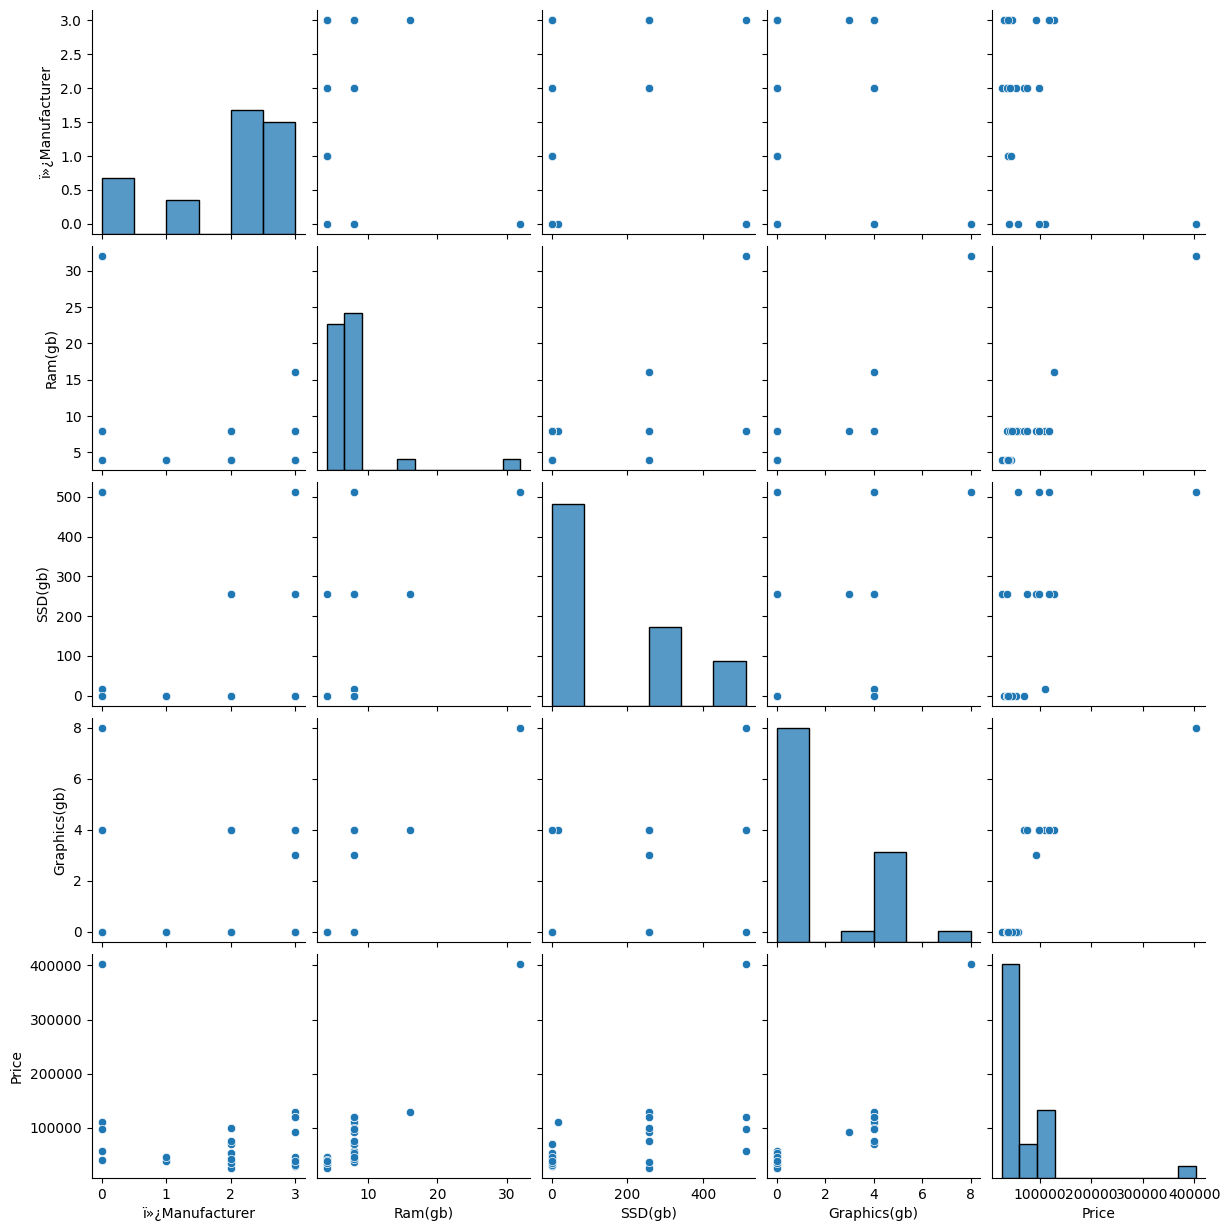

In [151]:
sb.pairplot(dataset)

Visualizing using Pearson's correlation method

<Axes: >

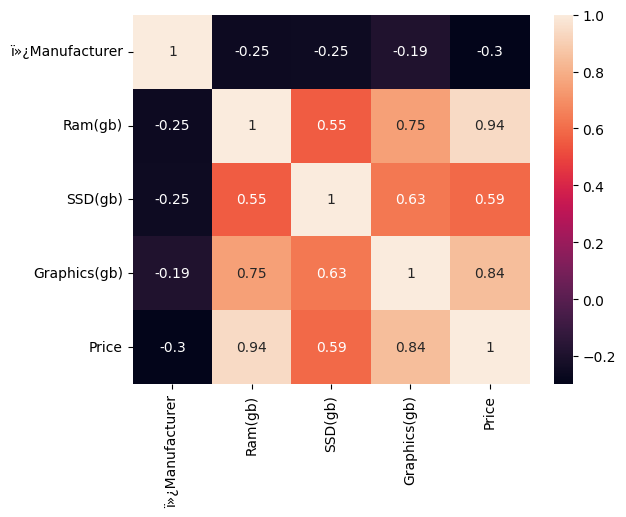

In [152]:
corr = dataset.corr(method='pearson')
sb.heatmap(corr, annot=True)

Splitting the cleaned data for training and testing

In [153]:
data = dataset.values
X,y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  # splitting in the ration 80:20

### 3. Choosing a Model

The Random Forest Regressor model will be chosen since it can handle well nonlinear relationships and regression

### 4. Training the model

In [154]:
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

### 5. Evaluating the Model

Checking the performance of the model on the test set

In [155]:
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.9260410691474025

### 6. Parameter Tuning

Defining the parameter grid

In [156]:
param_grid = {
    'n_estimators': [50, 100, 200, 500]
}

Performing grid search to find the optimal number of trees

In [157]:
regressor = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_regressor = grid_search.best_estimator_
best_n_estimators = best_regressor.n_estimators

Retraining the model after parameter tuning to increase accuracy

In [158]:
best_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

Re-evaluating to check if the accuracy increased

In [159]:
y_pred = best_regressor.predict(X_test)
r2_score(y_test, y_pred)

0.9510683989764424